In [ ]:
#Question-1

In [1]:
import requests
from bs4 import BeautifulSoup
import csv

# Step 1: Send a GET request to the website
url = "https://books.toscrape.com"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Step 2: Find all book containers
books = soup.find_all('article', class_='product_pod')[:10]  # First 10 books

# Step 3: Extract titles and prices
book_data = []

for book in books:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text
    book_data.append([title, price])
    print(f"Title: {title} | Price: {price}")

# Step 4: Save results to a CSV file
with open('books_scraped.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Title', 'Price'])
    writer.writerows(book_data)

print("\n✅ Data saved to 'books_scraped.csv'")


Title: A Light in the Attic | Price: Â£51.77
Title: Tipping the Velvet | Price: Â£53.74
Title: Soumission | Price: Â£50.10
Title: Sharp Objects | Price: Â£47.82
Title: Sapiens: A Brief History of Humankind | Price: Â£54.23
Title: The Requiem Red | Price: Â£22.65
Title: The Dirty Little Secrets of Getting Your Dream Job | Price: Â£33.34
Title: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull | Price: Â£17.93
Title: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics | Price: Â£22.60
Title: The Black Maria | Price: Â£52.15

✅ Data saved to 'books_scraped.csv'


In [ ]:
#Question-2

In [2]:
import requests
import json

# STEP 1: Replace this with your actual NewsAPI key
api_key = 'YOUR_NEWSAPI_KEY'  # <-- 🔴 IMPORTANT: Replace with your key

# STEP 2: Define the endpoint and parameters
url = 'https://newsapi.org/v2/top-headlines'
params = {
    'category': 'technology',
    'country': 'in',
    'apiKey': api_key,
    'pageSize': 10
}

# STEP 3: Make the GET request
response = requests.get(url, params=params)
data = response.json()

# STEP 4: Extract required fields: title, source, publishedAt
articles = data.get('articles', [])  # fallback to empty list if no data
extracted = []

for article in articles:
    entry = {
        'title': article['title'],
        'source': article['source']['name'],
        'publishedAt': article['publishedAt']
    }
    extracted.append(entry)
    print(f"Title: {entry['title']}\nSource: {entry['source']}\nPublished At: {entry['publishedAt']}\n")

# STEP 5: Save results to JSON file
with open('technology_news_india.json', 'w', encoding='utf-8') as f:
    json.dump(extracted, f, indent=4)

print("\n✅ News data saved to 'technology_news_india.json'")



✅ News data saved to 'technology_news_india.json'


In [5]:
import numpy as np
import pandas as pd

In [ ]:

#Question-3

        City  Temperature (°C)  Humidity (%)         Condition
0      Delhi             33.05            58     broken clouds
1     Mumbai             28.99            84   overcast clouds
2    Kolkata             27.97            73   overcast clouds
3    Chennai             37.15            55  scattered clouds
4  Bengaluru             27.80            59  scattered clouds


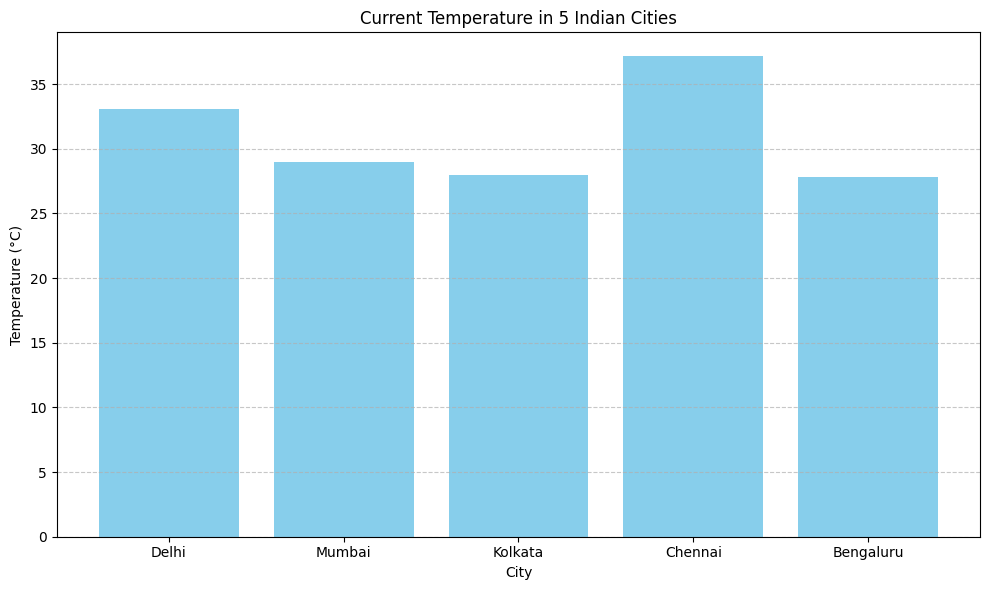

In [9]:
!pip install requests pandas matplotlib


import requests
import pandas as pd
import matplotlib.pyplot as plt

# Replace this with your actual OpenWeatherMap API key
API_KEY = 'fd6531f18051fc97584d2b6c7247b64b'
BASE_URL = "https://api.openweathermap.org/data/2.5/weather"

# List of 5 Indian cities
cities = ["Delhi", "Mumbai", "Kolkata", "Chennai", "Bengaluru"]

# Collect weather data
weather_data = []

for city in cities:
    params = {
        'q': city + ',IN',
        'appid': API_KEY,
        'units': 'metric'  # To get temperature in Celsius
    }
    response = requests.get(BASE_URL, params=params)
    data = response.json()

    if response.status_code == 200:
        weather_data.append({
            "City": city,
            "Temperature (°C)": data['main']['temp'],
            "Humidity (%)": data['main']['humidity'],
            "Condition": data['weather'][0]['description']
        })
    else:
        print(f"Failed to fetch data for {city}")

# Convert to DataFrame
df = pd.DataFrame(weather_data)
print(df)

# Plot bar chart of temperatures
plt.figure(figsize=(10,6))
plt.bar(df["City"], df["Temperature (°C)"], color='skyblue')
plt.title("Current Temperature in 5 Indian Cities")
plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()